In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions import *
from sklearn import datasets
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [115]:
data = mnist.data.sample(frac=0.02,random_state=42)
targets = mnist.target.sample(frac=0.02,random_state=42)
X = data.values
y = targets.values

In [119]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import cluster

from sklearn.decomposition import PCA
n_digits = 10

reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = cluster.KMeans(init="k-means++", n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

KMeans(n_clusters=10)

In [121]:
# Centrage et Réduction
centroids = preprocessing.StandardScaler().fit_transform(kmeans.cluster_centers_)
centroids


array([[ 0.69907362,  1.37017999],
       [-0.64616607,  0.52064766],
       [-0.66594572, -1.43409161],
       [-1.03983716, -0.57213522],
       [ 2.04097422,  0.06711544],
       [ 1.07144842, -0.0425915 ],
       [-0.14529036,  1.27095865],
       [-1.48763542,  0.72282925],
       [ 0.03081231, -0.08171484],
       [ 0.14256617, -1.82119782]])

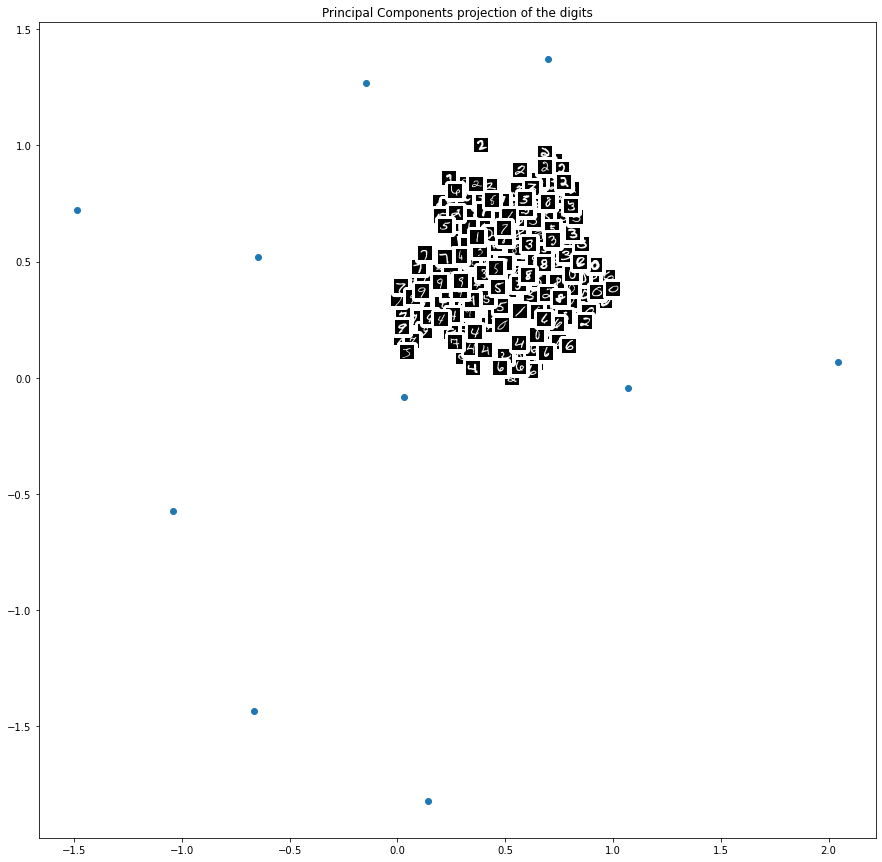

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import (manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection)
from matplotlib import offsetbox

image = data.values

# fonction pour afficher une partie des images sur la visualisation 2D
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(15, 15))
    ax = plt.subplot(111)

    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1., 1.]])
        for i in range(data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 2e-3:
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            props={ 'boxstyle':'round', 'edgecolor':'white'}
            images = np.reshape(image[i, :], (28, 28))

            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images, cmap=plt.cm.gray, zoom=0.5), X[i], bboxprops=props)
            ax.add_artist(imagebox)
    if title is not None:
        plt.title(title)
        
        
X = reduced_data
tsne = manifold.TSNE(n_components=2, perplexity=40, n_iter=3000, init='pca')
X_tsne = tsne.fit_transform(X_scaled)
plot_embedding(X_tsne, "Principal Components projection of the digits")
plt.scatter(centroids[:,0],centroids[:,1])
plt.show()

(1400, 785)

In [ ]:
# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, clusters,10)

In [ ]:
clusters = fcluster(Z, 10, criterion='maxclust')

In [ ]:
sample_idx = 24
sample_image = np.reshape(X[sample_idx, :], (28, 28))
plt.imshow(sample_image, cmap='binary')

In [ ]:
clusters_y = pd.DataFrame(columns= ["clusters_pred","clusters_True", "pred_equal_true"])
clusters_y["clusters_pred"] = clusters
clusters_y["clusters_True"] = y
clusters_y["clusters_True"] = clusters_y["clusters_True"].astype('int32')
clusters_y["pred_equal_true"] = clusters_y["clusters_pred"]==clusters_y["clusters_True"]


In [ ]:
clusters_y["clusters_pred"] == clusters_y["clusters_True"]

In [ ]:
clusters_y["pred_equal_true"].sum()/len(clusters_y)*100


In [ ]:
sample_idx = 2
sample_image = np.reshape(X[sample_idx, :], (28, 28))
plt.imshow(sample_image, cmap='binary')

In [ ]:
clusters_y

In [ ]:
clusters_y[clusters_y.clusters_pred==1]